We will implement decision tree algorithm for Pima Indians Diabetes Database. The task is to predict whether a patient has diabetes or not based on some diagnostic measures. Let's create a decision tree model using Scikit-learn.


In [15]:
#Importing the required libraries and modules
import numpy as np # library for numerical operations
import pandas as pd # library for data manipulation and analysis
import pydotplus # library for creating and displaying graphs from dot files

from sklearn import tree # module for decision tree algorithms
from sklearn.model_selection import train_test_split # module for splitting data into training and testing sets
from sklearn.tree import DecisionTreeClassifier # class for creating a decision tree classifier

from sklearn.tree import export_graphviz # function for exporting decision tree in DOT format
from sklearn.metrics import accuracy_score # function for calculating accuracy score
from sklearn.metrics import confusion_matrix # function for calculating confusion matrix
from six import StringIO # class for working with strings as file-like objects
from IPython.display import Image # class for displaying images in IPython environment

In [16]:
from sklearn.datasets import load_breast_cancer


# Load the dataset
cancer_data = load_breast_cancer()

# The dataset is returned as a Bunch object, which is similar to a dictionary.
# The features are in 'data' and the labels are in 'target'.
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target, name='target')

# Display the first few rows of the features and target
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Target (y):


,target
0,0
1,0
2,0
3,0
4,0


In [17]:
#split dataset in features and target variable

# Use the dataset loaded from sklearn.datasets
X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
y = pd.Series(cancer_data.target, name='target')

# Define feature columns for decision tree (using all available features from the sklearn dataset)
feature_cols = X.columns.tolist()

In [18]:
# Split dataset into training set and test set
# Use X and y from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)                       # 70% training and 30% test

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix \n", cm)

Accuracy: 88.30409356725146
Confusion matrix 
 [[56  7]
 [13 95]]


We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. The export_graphviz function converts the decision tree classifier into a dot file, and pydotplus converts this dot file to png or displayable form on Jupyter.

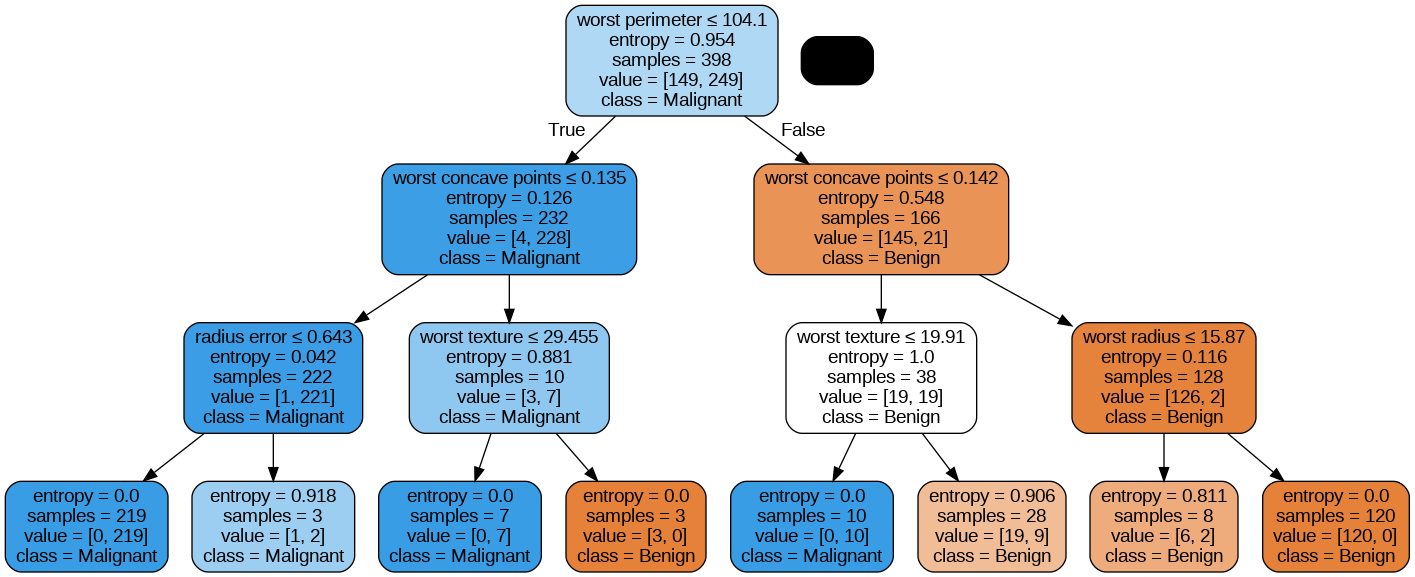

In [20]:
# Visualizing the decision tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Benign', 'Malignant']) # Use feature_cols and class_names from breast cancer dataset
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer_tree.png')
Image(graph.create_png())

Accuracy: 84.7953216374269
Confusion matrix 
 [[54  9]
 [17 91]]


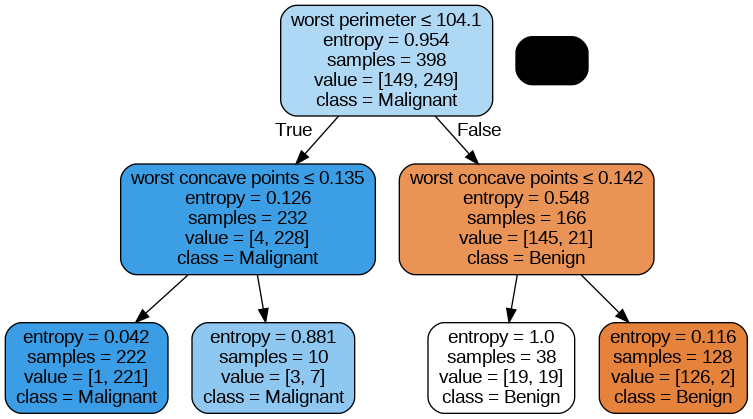

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix \n", cm)

# Visualizing the decision tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Benign', 'Malignant']) # Use feature_cols and class_names from breast cancer dataset
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer_tree_entropy.png')
Image(graph.create_png())

Accuracy: 86.54970760233918
Confusion matrix 
 [[49 14]
 [ 9 99]]


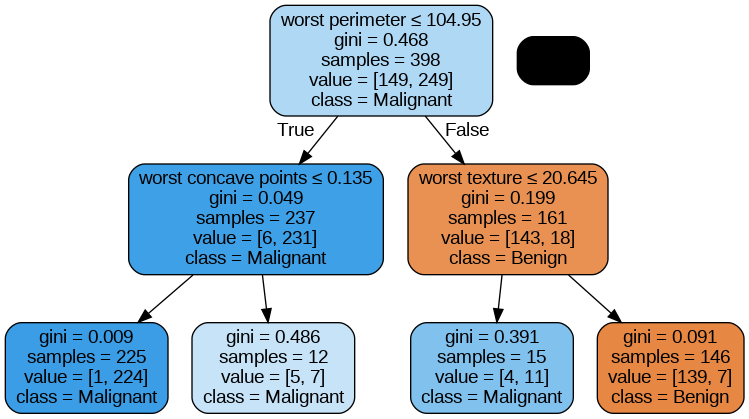

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
cm=confusion_matrix(y_test, y_pred)
print("Confusion matrix \n", cm)

# Visualizing the decision tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Benign', 'Malignant']) # Use feature_cols and class_names from breast cancer dataset
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('breast_cancer_tree_gini.png')
Image(graph.create_png())